In [1]:
goodnight_moon = """In the great green room There was a telephone And a red balloon
And a picture of-
The cow jumping over the moon
And there were three little bears sitting on chairs And two little kittens
And a pair of mittens
And a little toy house
And a young mouse
And a comb and a brush and a bowl full of mush And a quiet old lady who was whispering “hush” Goodnight room
Goodnight moon
Goodnight cow jumping over the moon Goodnight light
And the red balloon
Goodnight bears
Goodnight chairs
Goodnight kittens
And goodnight mittens
Goodnight clocks
And goodnight socks
Goodnight little house
And goodnight mouse
Goodnight comb
And goodnight brush
Goodnight nobody
Goodnight mush
And goodnight to the old lady whispering “hush” Goodnight stars
Goodnight air
Good night noises everywhere
"""

In [3]:
goodnight_moon = goodnight_moon.split('\n')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [55]:
tfd_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svd', TruncatedSVD(n_components=6))
])


In [56]:
tfd_pipe.fit(goodnight_moon)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ... TruncatedSVD(algorithm='randomized', n_components=6, n_iter=5,
       random_state=None, tol=0.0))])

In [57]:
tfd = tfd_pipe.steps[0][1]
svd = tfd_pipe.steps[1][1]

In [58]:
tfd, svd

(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None),
 TruncatedSVD(algorithm='randomized', n_components=6, n_iter=5,
        random_state=None, tol=0.0))

In [59]:
tfd_word_index = tfd.get_feature_names()

In [60]:
svd.components_.shape

(6, 55)

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def svd_variance(svd_model, col_index):
    
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(svd_model.components_)+1)]
    components = pd.DataFrame(np.round(svd_model.components_, 4), columns=col_index)
    ratios = svd_model.explained_variance_ratio_.reshape(len(svd_model.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (24,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar',legend='False');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend_.remove()


    # Display the explained variance ratios
    for i, ev in enumerate(svd_model.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

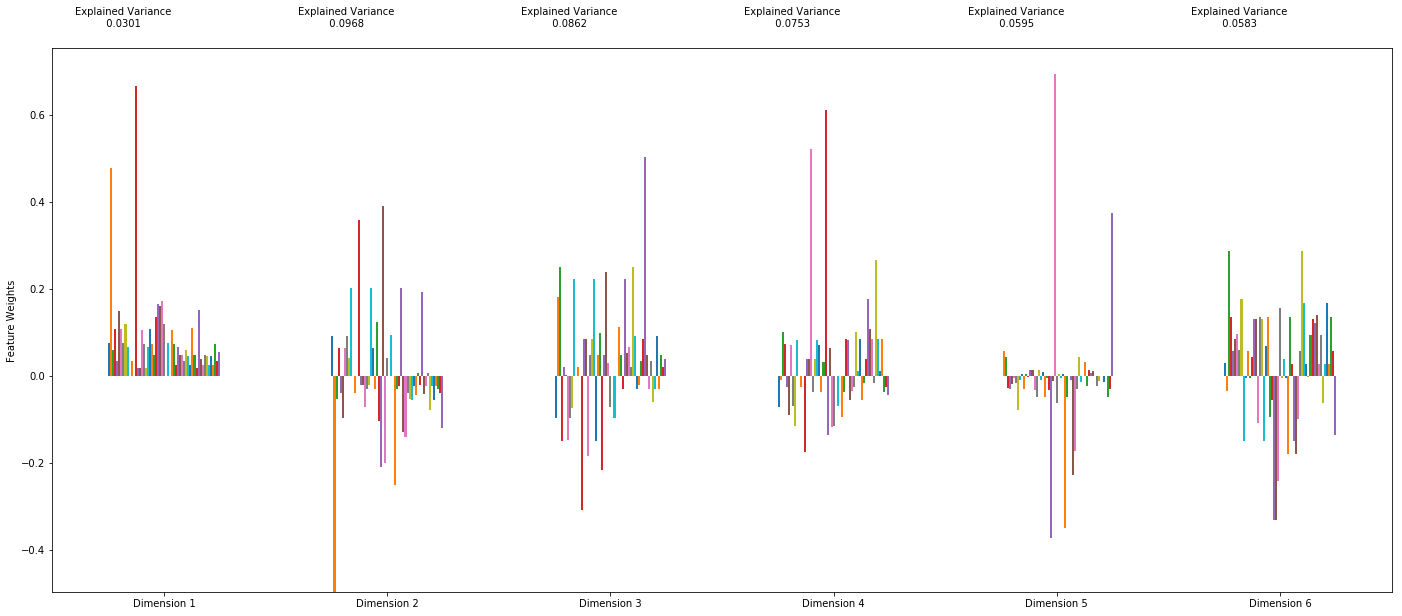

In [87]:
svd_variance(svd, tfd_word_index)

In [88]:
svd

TruncatedSVD(algorithm='randomized', n_components=6, n_iter=5,
       random_state=None, tol=0.0)

In [76]:
[word for word 
 in sorted(zip(tfd_word_index, svd.components_[0]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('goodnight', 0.66490452694396041), ('and', 0.47625233762535496)]

In [77]:
[word for word 
 in sorted(zip(tfd_word_index, svd.components_[1]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('moon', 0.39045319572159681),
 ('goodnight', 0.35713462324693779),
 ('and', -0.49610089780782568)]

In [78]:
[word for word 
 in sorted(zip(tfd_word_index, svd.components_[2]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('the', 0.5033247041551755), ('goodnight', -0.30797891575045772)]

In [79]:
[word for word 
 in sorted(zip(tfd_word_index, svd.components_[3]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('little', 0.61113099115805769), ('house', 0.52125587979772747)]

In [80]:
[word for word 
 in sorted(zip(tfd_word_index, svd.components_[4]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('mouse', 0.69302993806734459),
 ('young', 0.37431521095785775),
 ('of', -0.34849475126888374),
 ('mittens', -0.37256847306349006)]

In [81]:
[word for word 
 in sorted(zip(tfd_word_index, svd.components_[5]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('mittens', -0.33166641955405929), ('moon', -0.33206685924791535)]